# 오피지지 인턴 과정

오피지지 데이터 분석가 과정 교육을 수료하고 우수 교육생으로 한 달간 인턴 생활을 하게 되었습니다.

회사의 실무를 보면서 개인적으로 진행했던 과정에 대해 정리하고자 합니다.

본 내용들은 실제 인턴 생활에서 맡았던 업무와 관련 있다고 생각한 부분을 개인적으로 진행한 것 입니다.

실제 맡은 업무와는 상이할 수 있으니 참고 바랍니다.

## 미니맵 챔피언 인식

In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import subprocess

import matplotlib.pyplot as plt
from PIL import Image

import requests

import pytube

import warnings
warnings.filterwarnings("ignore")

## 1. 영상 로드 및 미니맵 자르기

여기서는 `yolov5` 모델을 이용해서 리그 오브 레전드 게임 영상에서 미니맵의 챔피언을 인식해보겠습니다.

모델의 성능은 고려하지 않고 전체 과정을 간단하게 살펴보았습니다.

In [3]:
# 영상의 의미지를 연속적으로 캡쳐할 수 있게 하는 class
# 33:25
vidcap = cv2.VideoCapture('my_replay.mp4')

count = 0

while vidcap.isOpened():
    # read()는 grab()와 retrieve() 두 함수를 한 함수로 불러옴
    # 두 함수를 동시에 불러오는 이유는 프레임이 존재하지 않을 때
    # grab() 함수를 이용하여 return false 혹은 NULL 값을 넘겨 주기 때문
    ret, image = vidcap.read()
    
    # 캡쳐된 이미지를 저장하는 함수
    try:
        cv2.imwrite(f"./images/original_image/frame_{str(count).zfill(3)}.jpg", image)
        print(f'Saved frame_{str(count).zfill(3)}.jpg')
    except:
        print("End Save image")
        break
    count += 1
    
# 메모리 해제
vidcap.release()

Saved frame_000.jpg
Saved frame_001.jpg
Saved frame_002.jpg
Saved frame_003.jpg
Saved frame_004.jpg
Saved frame_005.jpg
Saved frame_006.jpg
Saved frame_007.jpg
Saved frame_008.jpg
Saved frame_009.jpg
Saved frame_010.jpg
Saved frame_011.jpg
Saved frame_012.jpg
Saved frame_013.jpg
Saved frame_014.jpg
Saved frame_015.jpg
Saved frame_016.jpg
Saved frame_017.jpg
Saved frame_018.jpg
Saved frame_019.jpg
Saved frame_020.jpg
Saved frame_021.jpg
Saved frame_022.jpg
Saved frame_023.jpg
Saved frame_024.jpg
Saved frame_025.jpg
Saved frame_026.jpg
Saved frame_027.jpg
Saved frame_028.jpg
Saved frame_029.jpg
Saved frame_030.jpg
Saved frame_031.jpg
Saved frame_032.jpg
Saved frame_033.jpg
Saved frame_034.jpg
Saved frame_035.jpg
Saved frame_036.jpg
Saved frame_037.jpg
Saved frame_038.jpg
Saved frame_039.jpg
Saved frame_040.jpg
Saved frame_041.jpg
Saved frame_042.jpg
Saved frame_043.jpg
Saved frame_044.jpg
Saved frame_045.jpg
Saved frame_046.jpg
Saved frame_047.jpg
Saved frame_048.jpg
Saved frame_049.jpg


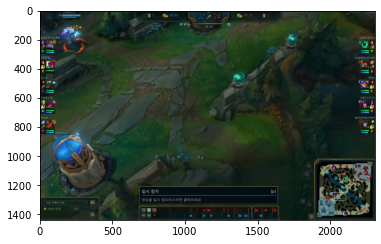

In [4]:
# 샘플로 1개 이미지 가져오기
img_basic = cv2.imread('images/original_image/frame_000.jpg', cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
img_basic.shape

(1440, 2304, 3)

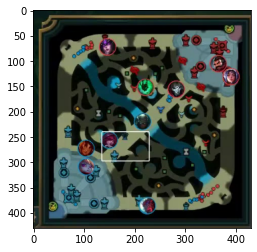

In [6]:
# 미니맵 자르기
img = img_basic[1010:,1874:,:]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# 원본 사진을 미니맵만 잘라 저장하기
origin_jpg_len = len(glob.glob('./images/original_image/*jpg'))

for i in range(origin_jpg_len-1):
    # 원본 사진 불러오기
    img_origin = cv2.imread(f'images/original_image/frame_{str(i).zfill(3)}.jpg', cv2.IMREAD_COLOR)
    # 미니맵 자르기
    img = img_origin[1010:,1874:,:]
    # 이미지 크기 변형
    expand = cv2.resize(img, None, fx=512/430, fy=512/430, interpolation=cv2.INTER_CUBIC)
    
    cv2.imwrite(f"./images/crop_image/crop_frame_{str(i).zfill(3)}.jpg", expand)

- 미니맵과 같은 사이즈로 resize 진행

### 라벨링

- 내용 추가 하기

In [15]:
# 이미지로 영상 만들기
# https://data-newbie.tistory.com/384
paths = sorted(glob.glob('./images/crop_image/*.jpg'))
fps = 60

frame_array = []
for idx , path in enumerate(paths) : 
    img = cv2.imread(path)
    height, width, layers = img.shape
    size = (width, height)
    frame_array.append(img)
out = cv2.VideoWriter('my_replay2.mp4', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

- 잘라낸 이미지로 영상 만들기 